# Chest vs. Watch Heart Rate Measurements

This post contrasts data collected simutaneously from chest and watch heart rate monitors. Further details are provided below. 

**Equipment:**

- [HRM-Dual Heart Rate Monitor (Chest)](https://www.amazon.com/Garmin-HRM-Dual-Heart-Rate-Monitor/dp/B07N3C5WRG/ref=asc_df_B07N3C5WRG/?tag=hyprod-20&linkCode=df0&hvadid=242015936822&hvpos=&hvnetw=g&hvrand=1102966153239086123&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9019573&hvtargid=pla-629682615255&psc=1)
- [VivoActive HR (Watch)](https://www.amazon.com/Garmin-vivoactive-GPS-Smartwatch-010-01605-03/dp/B06W51YXVC/ref=sr_1_4?dchild=1&keywords=vivoactive+hr&qid=1609004820&sr=8-4)

**Collected Data:**


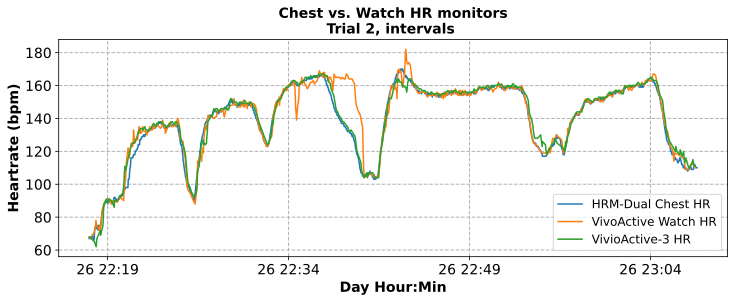

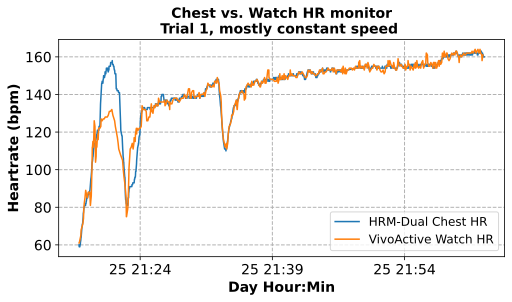

In [60]:
if 'fig_hr_2' in globals(): display(fig_hr_2) 
if 'fig_hr_1' in globals(): display(fig_hr_1) 

**Summary from data:**

For garmin specifically, the more modern Garmin watches appear to track their chest straps with a significant level of accuracy. Older watch versions, such as my Garmin Vivoactive HR 1stgen can mis-track heart rate leading to sizable accuracy issues until the watch re-latches onto the correct signal. For my situation, it does not appear there would be much if any benifit using a chest strap for HR measurement. Garmin's athletic electronics team seems to itterate their products rapidly making steps towards contious improvement which is neat to see. 

**Discussion:** 

Conventionally, chest straps are considered more accurate than watch HR monitors. I wanted to see data to understand this difference. Granted, my data is an incredibly limited scope case study. Regarding the measurement accuracy, to my knowledge this relates to the engineering challenges in both methods. The following is a summary of each mechanism: 

**Watch HR read mechanism:**

I found [this article](https://www.gsaglobal.org/forums/design-considerations-for-wrist-wearable-heart-rate-monitors-2/) a decent start on how a watch heart rate monitor works. When observing light transmited/reflected through the body, the intensity of the recieved light will vary with the heart pulsing. An easy way to observe this signal is to transmit light through the body, such as with a finger HR monitor, and the recieved analog signal is fairly clean and a clear rythmic signal can be observed. What a watch does is more tricky since it relies on reflected light. Reflected light, combined with the physical movement of the watch on the body, combined with varience in human bodies, can make reliable measurements a tedious challenege.     

**Watch HR mechanism:**

Similar to an [EKG](https://en.wikipedia.org/wiki/Electrocardiography), chest straps generally measure body voltages and track a rythmic signal. Having not personally done this, I have less insight into the difficulties with this proccess.


## Import & plot code 



In [32]:
# Library & plot imports 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import set_matplotlib_formats
# %matplotlib inline
# %matplotlib auto
# %matplotlib widget
set_matplotlib_formats('svg')
import numpy as np
import matplotlib as matplotlib
import math
import pandas
from matplotlib import animation, rc
from IPython.display import HTML
from pandas import DataFrame
from numpy import genfromtxt
from IPython.display import display

# Override plot defaults 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14 
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

In [53]:
# Import data from .csv 
# CSVs are created in excel from opening .trx/.gpx files and using excel's XML parsing

chest_hr_df = pandas.read_csv('data/chest_hr_1.csv')
watch_hr_df = pandas.read_csv('data/watch_hr_1.csv')

chest_hr_2_df = pandas.read_csv('data/chest_hr_2.csv')
watch_hr_2_df = pandas.read_csv('data/watch_vivo_hr_2.csv')
watch_v3_hr_2_df = pandas.read_csv('data/watch_vivo3_hr_2.csv')

chest_hr_df['date'] = pandas.to_datetime(chest_hr_df['time'])
watch_hr_df['date'] = pandas.to_datetime(watch_hr_df['time'])

chest_hr_2_df['date'] = pandas.to_datetime(chest_hr_2_df['time'])
watch_hr_2_df['date'] = pandas.to_datetime(watch_hr_2_df['time'])
watch_v3_hr_2_df['date'] = pandas.to_datetime(watch_v3_hr_2_df['time'])

# chest_hr_a = genfromtxt('chest_hr.csv', delimiter=',',skip_header=1)
# watch_hr_a = genfromtxt('watch_hr.csv', delimiter=',',skip_header=1)


Text(0.5, 1.0, 'Chest vs. Watch HR monitor\nTrial 1, mostly constant speed ')

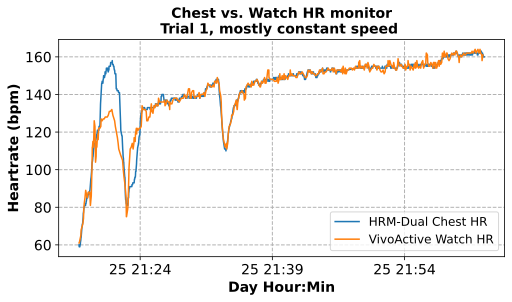

In [41]:
# Plot data 

fig_hr_1,ax1 = plt.subplots()
plt.plot(chest_hr_df['date'],chest_hr_df['chest_hr'])
plt.plot(watch_hr_df['date'],watch_hr_df['watch_hr'])
ax1.grid(color='0.7', linestyle='--', linewidth=1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
fig_hr_1.set_size_inches(8,4)
plt.ylabel('Heartrate (bpm)')
plt.xlabel('Day Hour:Min')
plt.legend(['HRM-Dual Chest HR','VivoActive Watch HR'])
plt.title('Chest vs. Watch HR monitor\nTrial 1, mostly constant speed ')

Text(0.5, 1.0, 'Chest vs. Watch HR monitors\nTrial 2, intervals ')

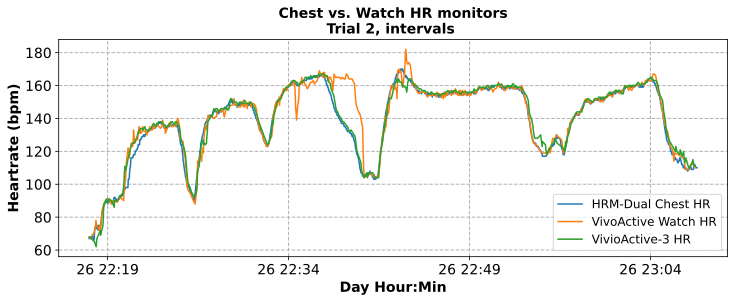

In [58]:
fig_hr_2,ax2 = plt.subplots()
plt.plot(chest_hr_2_df['date'],chest_hr_2_df['hr'])
plt.plot(watch_hr_2_df['date'],watch_hr_2_df['hr'])
plt.plot(watch_v3_hr_2_df['date'],watch_v3_hr_2_df['hr'])
ax2.grid(color='0.7', linestyle='--', linewidth=1)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
fig_hr_2.set_size_inches(12,4)
plt.ylabel('Heartrate (bpm)')
plt.xlabel('Day Hour:Min')
plt.legend(['HRM-Dual Chest HR','VivoActive Watch HR','VivioActive-3 HR'])
plt.title('Chest vs. Watch HR monitors\nTrial 2, intervals ')